In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.metrics import r2_score
import xgboost as xgb
import numpy
from xgboost import XGBRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)

In [47]:
df = pd.read_csv("son_hali_araba.csv")
df.head()

,Unnamed: 0,Fiyat,Marka,Seri,Model,Yıl,Yakıt Tipi,Vites Tipi,Motor Hacmi,Motor Gücü,Kilometre,Toplam Tramer Tutarı
0,0,305000,25,72,202,2011,1,0,1598,105,215,0.0
1,1,95000,20,38,12,2005,2,0,1149,75,275,0.0
2,2,430000,6,50,117,2016,1,2,1499,120,152,2500.0
3,3,320000,8,103,148,2014,1,1,1582,128,128,7000.0
4,4,418000,7,37,220,2018,2,1,1597,125,41,0.0


Text(0, 0.5, 'Yıl')

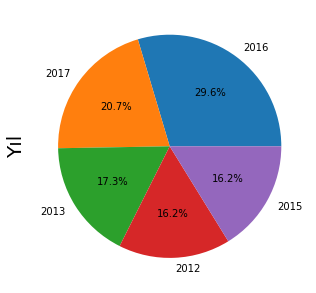

In [48]:
fig = plt.figure(figsize=(5,15))
df["Yıl"].value_counts().head().plot(kind = 'pie',autopct='%.1f%%');
plt.ylabel("Yıl", fontsize = 20)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,460.0,229.500000,132.934821,0.0,114.75,229.5,344.25,459.0
Fiyat,460.0,291392.813043,263418.229788,25750.0,148125.00,232500.0,359000.00,2990000.0
Marka,460.0,15.006522,8.379478,0.0,6.00,17.5,22.25,26.0
Seri,460.0,50.339130,26.286137,0.0,37.00,49.0,69.00,104.0
Model,460.0,147.471739,82.803606,0.0,73.75,145.5,209.25,301.0
Yıl,460.0,2011.291304,7.450778,1974.0,2007.00,2013.0,2016.00,2022.0
Yakıt Tipi,460.0,0.993478,0.730566,0.0,0.00,1.0,2.00,2.0
Vites Tipi,460.0,0.784783,0.855195,0.0,0.00,1.0,2.00,2.0
Motor Hacmi,460.0,1487.452174,290.093479,349.0,1368.00,1461.0,1597.00,4501.0
Motor Gücü,460.0,113.721739,42.450391,54.0,90.00,105.0,125.00,525.0


In [41]:
df["Kilometre"].value_counts()

132    8
100    6
128    6
0      6
230    5
95     5
200    5
178    5
120    5
330    5
350    4
280    4
113    4
23     4
250    4
65     4
180    4
96     4
125    4
22     4
260    4
12     4
186    4
149    4
220    3
193    3
257    3
275    3
102    3
143    3
210    3
212    3
69     3
115    3
224    3
34     3
134    3
111    3
72     3
60     3
92     3
155    3
247    3
145    3
292    3
310    3
29     3
153    3
86     3
198    3
269    3
112    3
144    3
97     3
270    3
142    3
127    3
73     3
190    3
138    3
90     3
152    3
159    3
45     2
8      2
68     2
49     2
82     2
19     2
168    2
290    2
87     2
174    2
252    2
170    2
135    2
295    2
110    2
53     2
83     2
137    2
74     2
24     2
140    2
104    2
300    2
166    2
197    2
20     2
58     2
130    2
215    2
188    2
85     2
209    2
2      2
43     2
157    2
76     2
380    2
238    2
103    2
1      2
225    2
141    2
213    2
63     2
79     2
44     2
214    2
150    2
2

In [7]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.drop("Model", axis = 1, inplace = True)

In [8]:
X = df.drop(["Fiyat"], axis = 1)
y = df["Fiyat"] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 144)

In [10]:
params = {"colsample_bytree":[0.4,0.5,0.6],
          "learning_rate":[0.01,0.02,0.09],
          "max_depth":[2,3,4,5,6],
          "n_estimators":[100,200,500,2000]}

In [11]:
xgb1 = XGBRegressor(colsample_bytree = 0.4, 
                    learning_rate = 0.02, 
                    max_depth = 5, 
                    n_estimators = 2000)

In [12]:
model_xgb = xgb1.fit(X_train, y_train)

C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [13]:
model_xgb.score(X_test, y_test)

0.8486986216961285

In [14]:
print('Test Seti Doğruluğu : {}%'.format(round(model_xgb.score(X_test, y_test)*100,2)))

Test Seti Doğruluğu : 84.87%


C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [24]:
np.sqrt(-1*(cross_val_score(model_xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error'))).mean()


C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-

91097.15731729925

In [18]:
importance = pd.DataFrame({"Importance": model_xgb.feature_importances_},
                         index=X_train.columns)

In [19]:
importance

,Importance
Marka,0.146050
Seri,0.064487
Yıl,0.121838
Yakıt Tipi,0.058485
Vites Tipi,0.160530
Motor Hacmi,0.136012
Motor Gücü,0.217596
Kilometre,0.085501
Toplam Tramer Tutarı,0.009500


In [20]:
pre = model_xgb.predict(X_test)[10:100]


C:\Users\sonay\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [51]:
tahmin =  model_xgb.predict(X_test)[10:20]
tahmin

array([227013.2  , 207530.75 ,  82878.555, 553933.5  , 259459.6  ,
       320933.7  , 441807.06 , 146546.38 , 416928.94 , 171447.56 ],
      dtype=float32)

In [52]:
y_test[10:20]

459    144000
350    270000
144     92500
222    700000
28     208000
286    395000
117    615000
162    122000
53     434900
190    126900
Name: Fiyat, dtype: int64

In [21]:
gercek = y_test.tolist()
songercek = gercek[10:100]
gercek[10:20]


[144000, 270000, 92500, 700000, 208000, 395000, 615000, 122000, 434900, 126900]

In [22]:
prelist = pre.tolist()
print(prelist)

[227013.203125, 207530.75, 82878.5546875, 553933.5, 259459.59375, 320933.6875, 441807.0625, 146546.375, 416928.9375, 171447.5625, 319355.5625, 63263.9765625, 264665.34375, 397592.46875, 412191.5, 414546.34375, 313922.09375, 127128.2890625, 368026.53125, 759026.75, 368130.125, 476771.0625, 576501.1875, 92999.2734375, 218478.09375, 208856.9375, 681292.0, 123707.015625, 275204.96875, 127833.34375, 571839.375, 143547.78125, 231513.765625, 169840.28125, 105267.4453125, 263375.25, 221341.296875, 135633.203125, 396262.46875, 192613.03125, 409062.84375, 249877.078125, 48626.4140625, 132179.296875, 281981.4375, 256936.921875, 88742.6796875, 337436.78125, 147161.9375, 516540.84375, 224640.484375, 204562.921875, 46548.65625, 293639.0, 182551.015625, 144731.296875, 173027.609375, 340514.875, 332858.0625, 762163.75, 175888.859375, 66369.5078125, 99375.421875, 151292.359375, 140794.953125, 161261.28125, 1143783.375, 133586.046875, 98780.3203125, 431425.0, 213301.015625, 99866.5703125, 580668.8125, 7

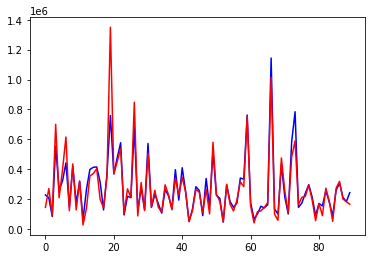

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pre , 'b')
plt.plot(songercek , 'r')